<a href="https://colab.research.google.com/github/npgeorge/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/NGeorge_LS_DS_Unit_4_Sprint_Challenge_3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [2]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

# TODO - your code!


In [6]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

#max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80 #increase this to increase accuracy... time constraint
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
8982 train sequences
2246 test sequences


In [7]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (8982, 80)
x_test shape: (2246, 80)


In [8]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [9]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 44s 5ms/step - loss: -241.8689 - accuracy: 0.0498 - val_loss: -392.0852 - val_accuracy: 0.0396
Epoch 2/5
8982/8982 [==============================] - 42s 5ms/step - loss: -537.8946 - accuracy: 0.0499 - val_loss: -670.0838 - val_accuracy: 0.0396
Epoch 3/5
8982/8982 [==============================] - 42s 5ms/step - loss: -819.5907 - accuracy: 0.0499 - val_loss: -949.7596 - val_accuracy: 0.0396
Epoch 4/5
8982/8982 [==============================] - 42s 5ms/step - loss: -1101.9077 - accuracy: 0.0499 - val_loss: -1227.2639 - val_accuracy: 0.0396
Epoch 5/5
2246/2246 [==============================] - 1s 406us/step
Test score: -1502.8110042853962
Test accuracy: 0.03962600231170654


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Padding normalizes the length of the reviews so the dataset can be trained. You need to do this so that each sequence has the same length, or your model will not be able to be trained. 


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

The primary motivation for using LSTM's is because it resolves the vanishing gradient descent problem that RNN's suffer from.


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

#### RNN's

1.) One-to-Many: An observation as input mapped to a sequence with multiple steps as an output.

2.) Many-to-One: A sequence of multiple steps as input mapped to class or quantity prediction.

3.) Many-to-Many: A sequence of multiple steps as input mapped to a sequence with multiple steps as output.

#### LSTM's

1.)Language Modeling

2.)Image Captioning

3.)Machine Translation or sequence to sequence learning


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2 to help resize the images prior to inference. 

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#frog_images = "/content/drive/My Drive/Lambda School/Unit 4 Sprint 3/frog_images"

In [0]:
from skimage.io import imread_collection

train_images = "/content/drive/My Drive/Lambda School/Unit 4 Sprint 3/frog_images"

In [42]:
print(type(train_images))
print(type(train_images[0]), end="\n\n")

<class 'str'>
<class 'str'>



In [57]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

sample = io.imread('/content/drive/My Drive/Lambda School/Unit 4 Sprint 3/frog_images/train/zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg')
sample_grayscale = rescale_intensity(color.rgb2gray(sample))
sample_grayscale.shape

(2673, 3382)

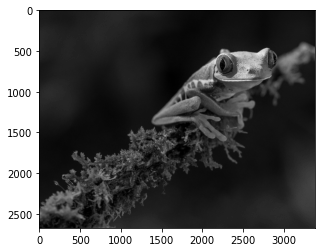

In [58]:
#check
plt.imshow(sample_grayscale, cmap="gray");

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [0]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
import tensorflow
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# create a data generator
ImageDataGenerator = tensorflow.keras.preprocessing.image.ImageDataGenerator

datagen = ImageDataGenerator()

In [46]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

#create model
model = Sequential()
model.add(ResNet50V2(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(2, activation='softmax'))

#Reduce learning rate when a metric has stopped improving...
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.001, patience=1)

#compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Print summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Model)           (None, 2048)              23564800  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,568,898
Trainable params: 23,523,458
Non-trainable params: 45,440
_________________________________________________________________


In [47]:
#train

train_it = datagen.flow_from_directory(train_images,
                                       batch_size=32,
                                       class_mode='categorical',
                                       target_size=(256, 256),
                                       shuffle=True)



Found 15 images belonging to 1 classes.


In [48]:
epochs = 10

stop = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.001, patience=3, verbose=1)
filepath="/content/drive/My Drive/Lambda School/Unit 4 Sprint 3/data/sc_resnet50V2_imagegenerator.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto', save_freq='epoch')

model.fit_generator(
        train_it,
        epochs=epochs,
        verbose=1,
        steps_per_epoch=20,
        callbacks=[stop, checkpoint, rlrop], 
        validation_steps=20)


Epoch 1/10
20/20 [==============================] - 46s 2s/step - loss: 1.6291 - accuracy: 0.4733 - lr: 0.0010
Epoch 2/10
20/20 [==============================] - 46s 2s/step - loss: 1.3939 - accuracy: 0.3867 - lr: 0.0010
Epoch 3/10
20/20 [==============================] - 46s 2s/step - loss: 1.3893 - accuracy: 0.6467 - lr: 0.0010
Epoch 4/10
20/20 [==============================] - 46s 2s/step - loss: 1.3881 - accuracy: 0.6533 - lr: 0.0010
Epoch 5/10
20/20 [==============================] - 46s 2s/step - loss: 1.3880 - accuracy: 0.6667 - lr: 0.0010
Epoch 6/10
20/20 [==============================] - 46s 2s/step - loss: 1.3878 - accuracy: 0.6667 - lr: 0.0010
Epoch 7/10
20/20 [==============================] - 46s 2s/step - loss: 1.3878 - accuracy: 0.6667 - lr: 0.0010
Epoch 8/10
20/20 [==============================] - 46s 2s/step - loss: 1.3878 - accuracy: 0.6667 - lr: 0.0010
Epoch 9/10
20/20 [==============================] - 45s 2s/step - loss: 1.3878 - accuracy: 0.6667 - lr: 0.0010
E

In [55]:
#single image with predicted label

from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50V2(weights='imagenet')

img_path = '/content/drive/My Drive/Lambda School/Unit 4 Sprint 3/frog_images/train/zdenek-machacek-HYTwWSE5ztw-unsplash (1).jpg'
img = image.load_img(img_path, target_size=(500, 500))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n07613480', 'trifle', 1.0), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0), ('n02391049', 'zebra', 0.0), ('n02389026', 'sorrel', 0.0)]


<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 

A good use case might be to use an autoencoder on predicting prices of stocks. There are many parameters one could gather and an autoencoder could help in signaling the noise through dimensionality reduction. 

Another good use case autoencoders are used for is image compression. 


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
  - My strongest area is my ability to make sure the data is cleaned and filtered to give the models the best chance at makng accurate predictions.
- What area of Data Science would you most like to learn more about, and why?
   - I'd like to go deep into computer/machine vision. I think this will be an exciting ever expanding field in years to come across many different industries and I find it exciting.
- Where do you think Data Science will be in 5 years?
   - Heavily focused on analyzing depth maps from autonomous cars and AR glasses.
- What are the threats posed by AI to our society?
   - If used maliciously, AI could cause a lot of harm. I think we are very far away from a fully functioning human AI. I worry about AI mixed with drones to carry out acts of terror.
- How do you think we can counteract those threats?
  - Be proactive in our preparation of possible threats.
- Do you think achieving General Artifical Intelligence is ever possible?
  - Humans still don't understand everything about themselves. When that day comes, we might be able to achieve GAI, but not until then. I think we are much farther off from GAI then hype suggests.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [59]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")